# Transformers, what can they do?

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [1]:
!pip install datasets evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.2 MB/s eta 0:00:00


The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

We can even pass several sentences!



In [3]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

*  The text is preprocessed into a format the model can understand.
*  The preprocessed inputs are passed to the model.
*  The predictions of the model are post-processed, so you can make sense of them.
*  Available pipelines for different modalities
The pipeline() function supports multiple modalities, allowing you to work with text, images, audio, and even multimodal tasks.

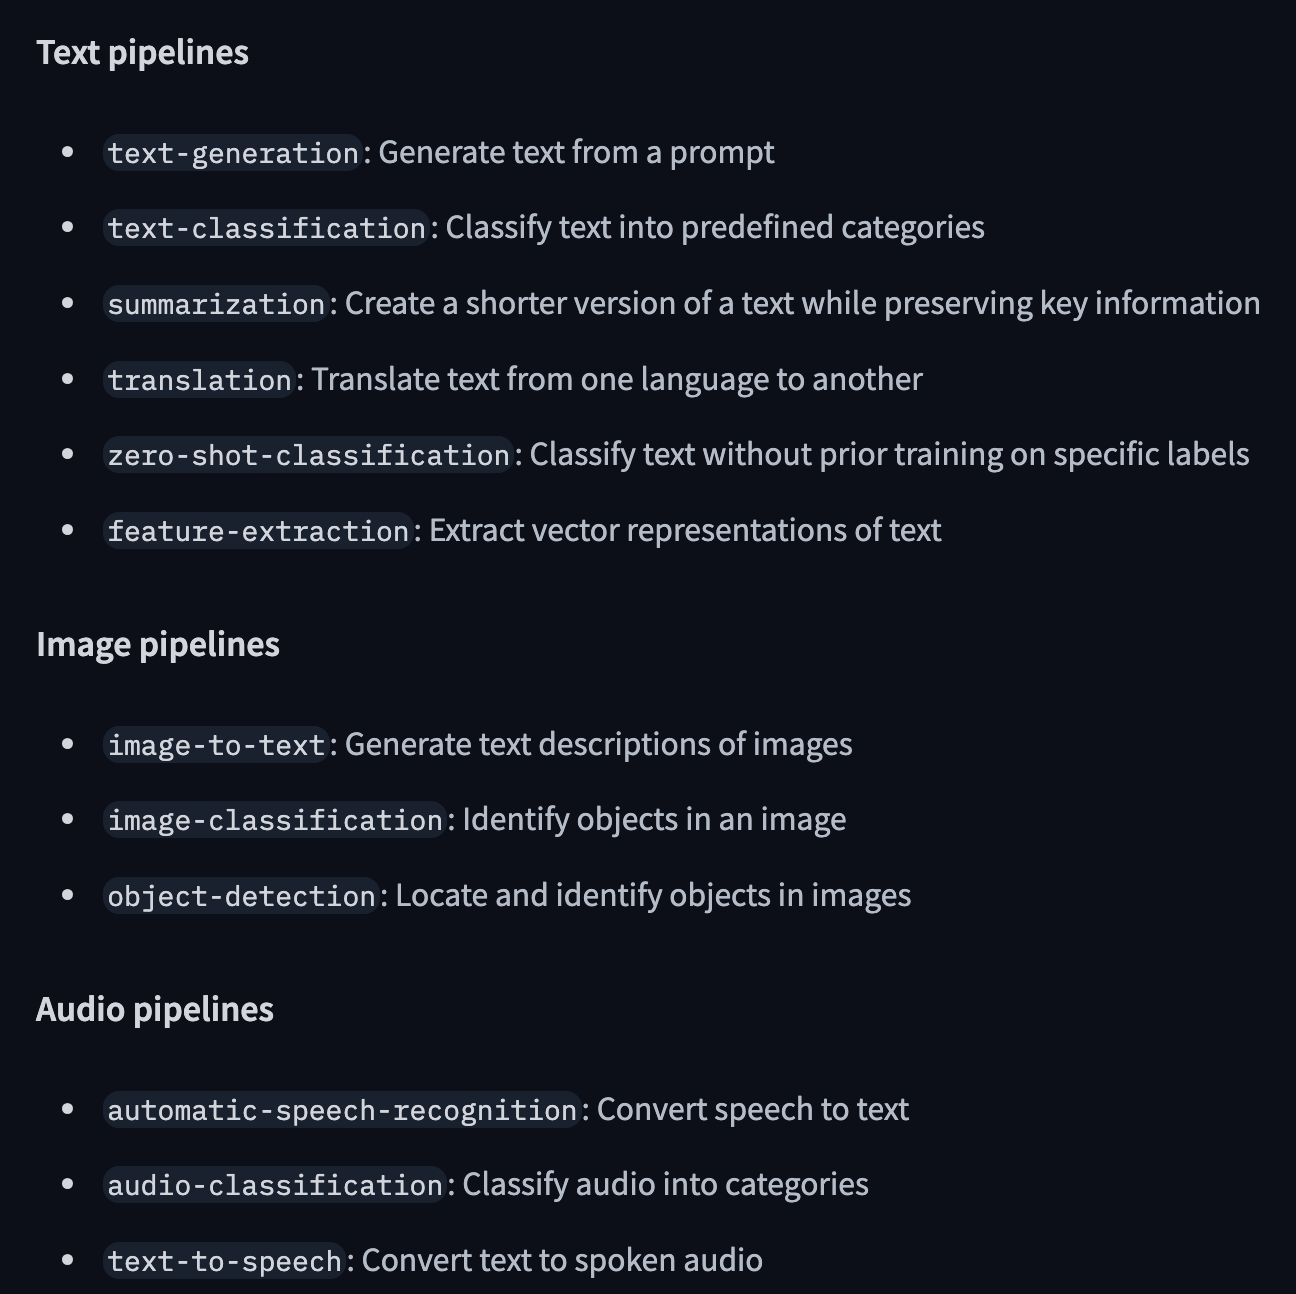

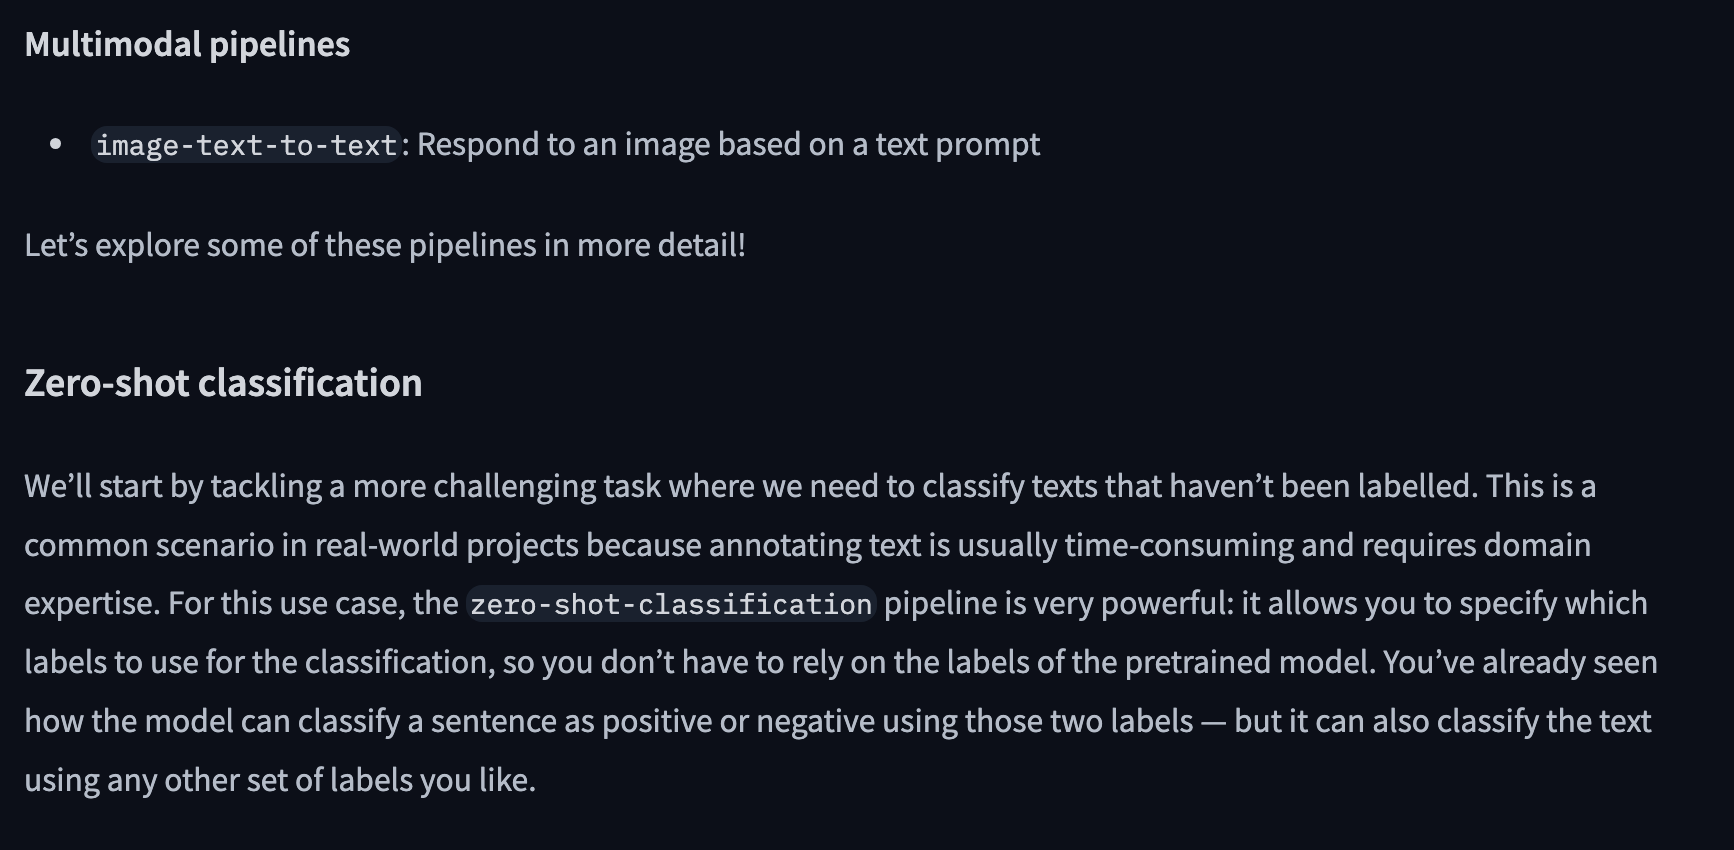

In [5]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/515 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445985913276672, 0.11197450757026672, 0.04342687129974365]}

This pipeline is called zero-shot because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

In [4]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: openai-community/gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In this course, we will teach you how to use the Internet to discover who you are and what you want to be. This course is going to teach you how to use the Internet to find out who you are, what you want to be, and what you want to be. This course is going to teach you how to use the Internet to discover who you are, what you want to be, and what you want to be. This course is going to teach you how to use the Internet to discover who you are, what you want to be, and what you want to be. This course is going to teach you how to use the Internet to discover who you are, what you want to be, and what you want to be. This course is going to teach you how to use the Internet to discover who you are, what you want to be, and what you want to be. This course is going to teach you how to use the Internet to discover who you are, what you want to be, and what you want to be. This course is going to teach you how to use the Internet to discover who you are, what you want t

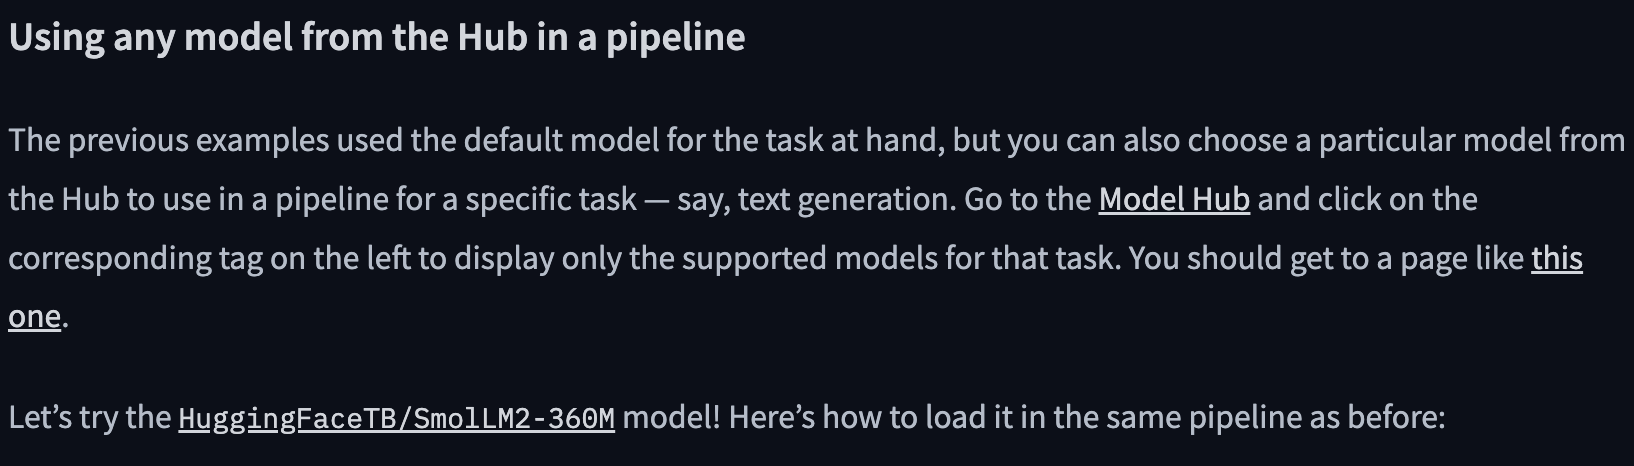

In [6]:
from transformers import pipeline

generator = pipeline("text-generation", model="HuggingFaceTB/SmolLM2-360M")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/724M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/290 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

Passing `generation_config` together with generation-related arguments=({'max_length', 'num_return_sequences'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In this course, we will teach you how to design a perfect balance in your relationship with your partner. We will teach you how to manage your emotions, how to listen to your partner, and how to find your own unique way to communicate with your partner that works for you.\n\nWe will also teach you how to express yourself in a confident and assertive way.\n\nDo you have a partner who is always on the defensive? Do you find yourself constantly apologizing for your actions? Do you find yourself constantly correcting your partner? Do you feel like you are always on the defensive?\n\nIf so, you are not alone.\n\nMany people feel this way, especially if they have a history of abuse.\n\nBut there is a way to break this cycle and get your partner to agree to a healthier relationship.\n\nThe key to a healthy relationship is to find a way to communicate your needs and desires, and to listen to your partner.\n\nBut many people feel that they can’t or won’t do this.\n\nSo what

In [7]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/76 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: distilgpt2
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
transformer.h.{0, 1, 2, 3, 4, 5}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In this course, we will teach you how to use the tool to start a new project!\n\n\n\nThe first step in the process is to learn all the concepts of the method and the code. When you learn the basics of the method, you will learn how to use the tool to start a new project. This is the first step in learning how to use the tool to start a new project.\nThe second step is to learn all the concepts of the method and the code. When you learn the basics of the method, you will learn how to use the tool to start a new project.\nThe third step is to learn the principles of the method and the code. When you learn the principles of the method, you will learn how to use the tool to start a new project.\nThe fourth step is to learn the principles of the method and the code. When you learn the principles of the method, you will learn how to use the tool to start a new project.\nThe fourth step is to learn the principles of the method and the code. When you learn the principles o

You can refine your search for a model by clicking on the language tags, and pick a model that will generate text in another language. The Model Hub even contains checkpoints for multilingual models that support several languages.

Once you select a model by clicking on it, you’ll see that there is a widget enabling you to try it directly online. This way you can quickly test the model’s capabilities before downloading it.

The next pipeline you’ll try is fill-mask. The idea of this task is to fill in the blanks in a given text:

In [8]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/106 [00:00<?, ?it/s]

RobertaForMaskedLM LOAD REPORT from: distilbert/distilroberta-base
Key                         | Status     |  | 
----------------------------+------------+--+-
roberta.pooler.dense.bias   | UNEXPECTED |  | 
roberta.pooler.dense.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

[{'score': 0.19619713723659515,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.040527280420064926,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

The top_k argument controls how many possibilities you want to be displayed. Note that here the model fills in the special <mask> word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

Named entity recognition
Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations. Let’s look at an example:

In [9]:
from transformers import pipeline

ner = pipeline("ner", aggregation_strategy="simple")
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/391 [00:00<?, ?it/s]

BertForTokenClassification LOAD REPORT from: dbmdz/bert-large-cased-finetuned-conll03-english
Key                      | Status     |  | 
-------------------------+------------+--+-
bert.pooler.dense.weight | UNEXPECTED |  | 
bert.pooler.dense.bias   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

[{'entity_group': 'PER',
  'score': np.float32(0.9981694),
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': np.float32(0.9796019),
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': np.float32(0.9932106),
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

Here the model correctly identified that Sylvain is a person (PER), Hugging Face an organization (ORG), and Brooklyn a location (LOC).

We pass the option grouped_entities=True in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity: here the model correctly grouped “Hugging” and “Face” as a single organization, even though the name consists of multiple words. In fact, as we will see in the next chapter, the preprocessing even splits some words into smaller parts. For instance, Sylvain is split into four pieces: S, ##yl, ##va, and ##in. In the post-processing step, the pipeline successfully regrouped those pieces.

The question-answering pipeline answers questions using information from a given context:

In [10]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/102 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

{'score': 0.6949770450592041, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

Note that this pipeline works by extracting information from the provided context; it does not generate the answer.

Summarization
Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text. Here’s an example:

In [18]:
text = """ summarize:
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""

In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

checkpoint = "google-t5/t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

inputs = tokenizer(text, return_tensors="pt").input_ids
outputs = model.generate(inputs, max_new_tokens=100, do_sample=False)
tokenizer.decode(outputs[0], skip_special_tokens=True)

Loading weights:   0%|          | 0/131 [00:00<?, ?it/s]

'the number of graduates in traditional engineering disciplines has declined. in most of the premier american universities engineering curricula now concentrate on and encourage largely the study of engineering science. rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering.'

In [20]:
text = "translate English to French: Welcome to this amazing session on Transformers."

from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

checkpoint = "google-t5/t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

inputs = tokenizer(text, return_tensors="pt").input_ids
outputs = model.generate(inputs, max_new_tokens=100, do_sample=False)
tokenizer.decode(outputs[0], skip_special_tokens=True)


Loading weights:   0%|          | 0/131 [00:00<?, ?it/s]

'Bienvenue à cette session extraordinaire sur Transformers.'

In [28]:
import soundfile as sf
import IPython.display as ipd
def play(file="https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"):
    ipd.display(ipd.Audio(file))



In [30]:
from transformers import pipeline

transcriber = pipeline(
    task="automatic-speech-recognition", model="openai/whisper-tiny"
)
# Play the audio file
audio_file="https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"
play(audio_file)
result = transcriber(
    audio_file
)
print(result)

Loading weights:   0%|          | 0/167 [00:00<?, ?it/s]

{'text': ' I have a dream, but one day, this nation will rise up, live out the true meaning of its dream.'}


In [36]:
from transformers import pipeline
from PIL import Image

image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"



image_classifier = pipeline(
    task="image-classification", model="google/vit-base-patch16-224"
)



result = image_classifier(
    image_url
)
print(result)

# To display the image inline in Colab, you can use IPython.display
from IPython.display import Image as IPImage
IPImage(url=image_url)


Loading weights:   0%|          | 0/200 [00:00<?, ?it/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


[{'label': 'lynx, catamount', 'score': 0.4334994852542877}, {'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 'score': 0.03479618951678276}, {'label': 'snow leopard, ounce, Panthera uncia', 'score': 0.03240194171667099}, {'label': 'Egyptian cat', 'score': 0.023944808170199394}, {'label': 'tiger cat', 'score': 0.022889263927936554}]
